<a href="https://colab.research.google.com/github/ttadesusi/Artificial-Intelligence-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

---

## **Using Regression Algorithms:**

**1.   Multilinear Regression (ML)**

**2.   Random Forest Regressor (RF)**

**3.   Extreme Gradient Boosting Regressor (XGB)**


## **DATA UNDERSTANDING**

There are two datasets:

1.   Train Data: 3000 observations and 12 variables
2.   Test Data: 999 observations and 12 variables

These datasets have the following features that describe the house characteristics which are used to predict the price of a house:

*   number of room
*   number of bathroom
*   number of kitchen
*   number of french_door
*   backyard
*   furnished
*   green_paint
*   solar_power	
*   woodfloor
*   qlm_security

## **DATA AQUISITION**

In [1]:
# import dataframe and numpy packages
import pandas as pd
import numpy as np

# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read train dataset into the dataframe
train_data_link = "http://drive.google.com/uc?id=1TKrP4mE6rsq3effIecEhHV4BuYT-zbsk"
df_train = pd.read_csv(train_data_link)

# display top 5 rows of the train data
df_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [3]:
# read test dataset into the dataframe
test_data_link = "http://drive.google.com/uc?id=1f-VKXrqc_Hj8QY1TC5uU8AFNuSc7_Dt6"
df_test = pd.read_csv(test_data_link)

# display top 5 rows of the test data
df_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


## **DATA DESCRIPTION**

In [4]:
# train data summary statistics
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,3000.0,2.990000,1.424281,1.0,2.0,3.0,4.0,5.0
bathroom,3000.0,1.489000,0.499962,1.0,1.0,1.0,2.0,2.0
kitchen,3000.0,1.522000,0.499599,1.0,1.0,2.0,2.0,2.0
french_door,3000.0,1.998333,0.813153,1.0,1.0,2.0,3.0,3.0
backyard,3000.0,0.490333,0.499990,0.0,0.0,0.0,1.0,1.0
furnished,3000.0,0.488667,0.499955,0.0,0.0,0.0,1.0,1.0
green_paint,3000.0,0.485000,0.499858,0.0,0.0,0.0,1.0,1.0
solar_power,3000.0,0.495667,0.500065,0.0,0.0,0.0,1.0,1.0
woodfloor,3000.0,0.512333,0.499931,0.0,0.0,1.0,1.0,1.0
qlm_security,3000.0,0.480667,0.499709,0.0,0.0,0.0,1.0,1.0


In [5]:
# train data info
print("Train data number of rows is", df_train.shape[0], "and", "number of columns is" , df_train.shape[1], "\n")  # Number of rows and column
print(df_train.info())  # display attributes (column) data type and number of non-empty cells

Train data number of rows is 3000 and number of columns is 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB
None


In [6]:
# test summary statistics
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,999.0,3.019019,1.413731,1.0,2.0,3.0,4.0,5.0
bathroom,999.0,1.491491,0.500178,1.0,1.0,1.0,2.0,2.0
kitchen,999.0,1.496496,0.500238,1.0,1.0,1.0,2.0,2.0
french_door,999.0,1.959960,0.809759,1.0,1.0,2.0,3.0,3.0
backyard,999.0,0.510511,0.500140,0.0,0.0,1.0,1.0,1.0
furnished,999.0,0.474474,0.499598,0.0,0.0,0.0,1.0,1.0
green_paint,999.0,0.523524,0.499696,0.0,0.0,1.0,1.0,1.0
solar_power,999.0,0.490490,0.500160,0.0,0.0,0.0,1.0,1.0
woodfloor,999.0,0.501502,0.500248,0.0,0.0,1.0,1.0,1.0
qlm_security,999.0,0.500501,0.500250,0.0,0.0,1.0,1.0,1.0


In [7]:
# test data info
print("Test data number of rows is", df_test.shape[0], "and", "number of columns is" , df_test.shape[1], '\n')  # Number of rows and column
print(df_test.info())  # display attributes (column) data type and number of non-empty cells

Test data number of rows is 999 and number of columns is 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB
None


## **DATA DISTRIBUTION**

In [8]:
# Train data Skewness
df_train.skew()

room            0.018306
bathroom        0.044033
kitchen        -0.088129
french_door     0.003050
backyard        0.038693
furnished       0.045368
green_paint     0.060057
solar_power     0.017343
woodfloor      -0.049373
qlm_security    0.077430
club_access     0.001334
price           0.004485
dtype: float64

In [9]:
# Train data Kurtosis
df_train.kurtosis()

room           -1.313355
bathroom       -1.999394
kitchen        -1.993563
french_door    -1.487607
backyard       -1.999837
furnished      -1.999275
green_paint    -1.997725
solar_power    -2.001034
woodfloor      -1.998895
qlm_security   -1.995335
club_access    -2.001333
price          -0.415660
dtype: float64

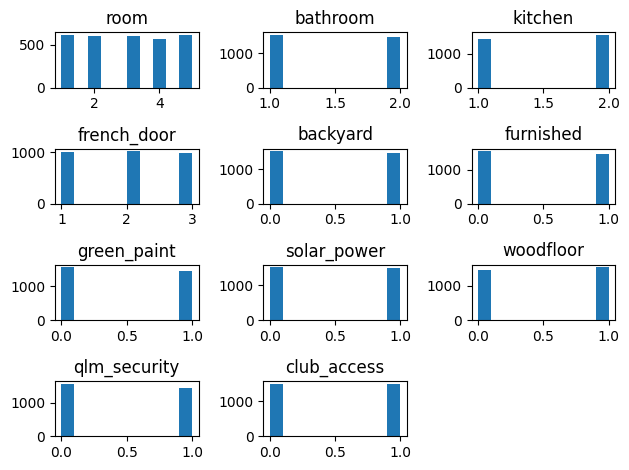

In [10]:
# plot features distribution for train data
df_train.drop(['price'], axis =1).hist(grid=False)
plt.tight_layout()

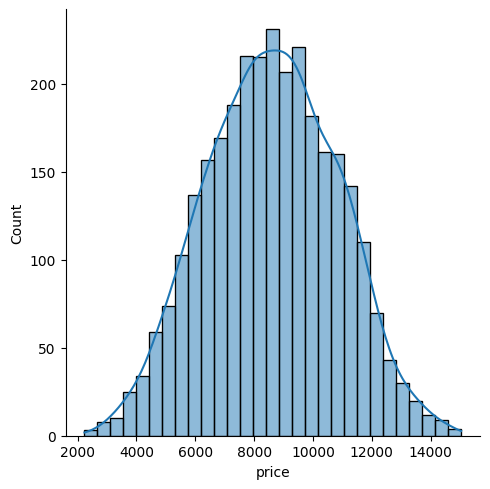

In [11]:
# plot target variable distribution for train data
sns.displot(df_train.price, kde=True)

<Axes: >

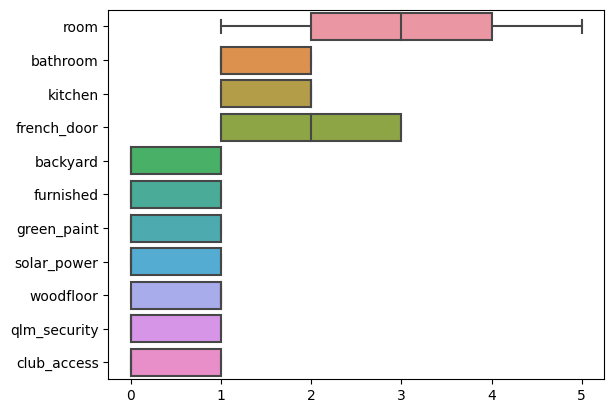

In [12]:
# boxplot for features
sns.boxplot(df_train.drop(['price'], axis =1),orient = 'h')

<Axes: >

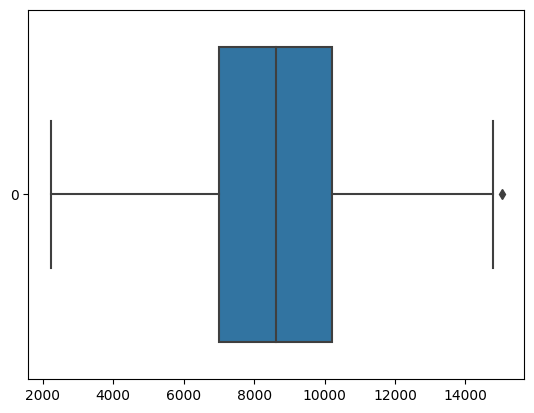

In [13]:
# boxplot for target variable
sns.boxplot(df_train.price,orient = 'h')

## **FEATURES AND TARGET SELECTION**

In [14]:
# features(X) and target(y) selection for train data
X_train = df_train.drop(['price'], axis=1)
y_train = df_train['price']

# features(X) and target(y) selection for train data
X_test = df_test.drop(['price'], axis=1)
y_test = df_test['price']

## **CORRELATION ANALYSIS**

In [15]:
#Find Correlation coefficients
corr_coef = []
for col in X_train.columns:
    coef = np.corrcoef(X_train[col], y_train).round(4)[0, 1]
    corr_coef.append((col, coef))

# Sort correlation coefficient in descending order
corr_coef.sort(key=lambda x: abs(x[1]), reverse=True)
corr_coef

[('room', 0.6494),
 ('furnished', 0.4527),
 ('woodfloor', 0.4345),
 ('solar_power', 0.3177),
 ('club_access', 0.1669),
 ('backyard', 0.1256),
 ('kitchen', 0.1228),
 ('french_door', 0.0879),
 ('qlm_security', 0.0792),
 ('green_paint', 0.0774),
 ('bathroom', 0.0627)]

<Axes: >

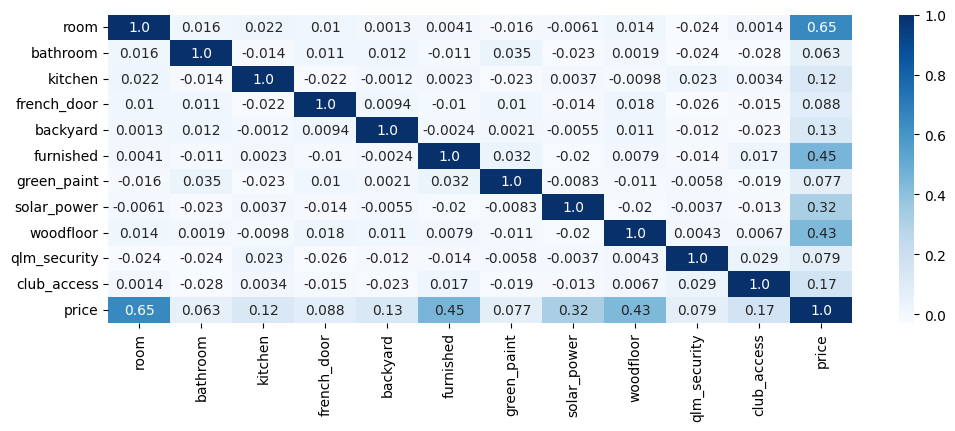

In [16]:
# feature correlation
plt.figure(figsize=(12,4))
sns.heatmap(df_train.corr(), annot=True, cmap="Blues", fmt='.2')

### **DATA STARDARDIZATION**

In [17]:
# import data scaling package
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## **MODEL BUILDING AND ACCURACY EVALUATION**

In [19]:
# import hyperparameters tuning package
from sklearn.model_selection import GridSearchCV

# import model evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### **MULTILINEAR REGRESSION (ML)**

In [20]:
# import multilinear regression package 
from sklearn.linear_model import LinearRegression
ML = LinearRegression()

In [21]:
# fitting the data
ML.fit(scaled_X_train, y_train)

# predicting the test data
y_pred_ML = ML.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_ML[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

Predicted y values:    [ 5058.  7677. 11338.  8870. 11199. 11410. 11768.  6845.  7827.  5897.]
Actual y test values:  [ 5068  7658 11318  8858 11178 11388 11748  6848  7828  5908]


### **Multilinear Regression Model Accuracy Evaluation**

In [22]:
# model accuracy metrics
r2_ML = r2_score(y_test, y_pred_ML).round(4)
MSE_ML = mean_squared_error(y_test, y_pred_ML).round(2)
MAE_ML = mean_absolute_error(y_test, y_pred_ML).round(2)

print('Train data - R-squared:', r2_score(y_train, ML.predict(scaled_X_train)).round(4))
print('Test data - R-squared:', r2_ML,'|', 'MSE:', MSE_ML,'|','MAE:', MAE_ML)

Train data - R-squared: 1.0
Test data - R-squared: 1.0 | MSE: 146.28 | MAE: 10.22


### **Multilinear Regression Line Fitting**

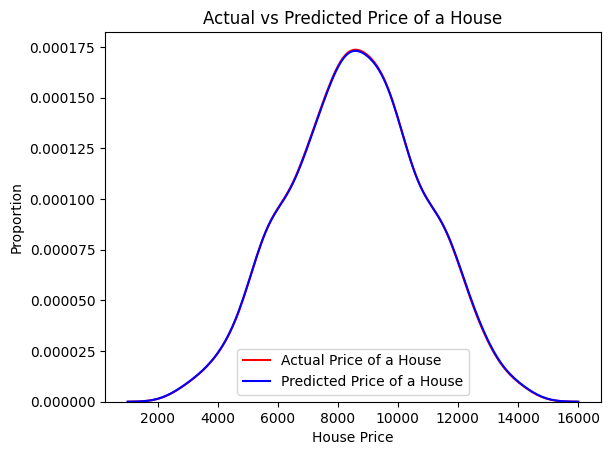

In [23]:
# plot actual price vs predicted price
ax1 = sns.kdeplot(y_test, color="r", label="Actual Price of a House")
ax = sns.kdeplot(y_pred_ML, color="b", label="Predicted Price of a House", ax = ax1)


plt.title('Actual vs Predicted Price of a House')
plt.xlabel('House Price')
plt.ylabel('Proportion')
plt.legend()

plt.show()
plt.close()

### **Features Importance in the Linear Regression Model**

In [24]:
# display the intercept and coefficients of the model
print('Intercept:', ML.intercept_.round())
print('Features Coefficients are:' , ML.coef_.round(), '\n')

print('price =', ML.intercept_.round(), '+ ', end='')
for i in range(0, len(ML.coef_)):
  print(ML.coef_[i].round(),'*',X_train.columns[i], '+ ', end='')
print('E')

Intercept: 8607.0
Features Coefficients are: [1424.  150.  250.  195.  280. 1000.  185.  765.  945.  220.  365.] 

price = 8607.0 + 1424.0 * room + 150.0 * bathroom + 250.0 * kitchen + 195.0 * french_door + 280.0 * backyard + 1000.0 * furnished + 185.0 * green_paint + 765.0 * solar_power + 945.0 * woodfloor + 220.0 * qlm_security + 365.0 * club_access + E


In [25]:
# calculating standard deviation for each feature
std = []
for i in X_train.columns:
  std = np.append(std, df_train[i].std())
  print('std for',i,'-->',df_train[i].std().round(2))

std for room --> 1.42
std for bathroom --> 0.5
std for kitchen --> 0.5
std for french_door --> 0.81
std for backyard --> 0.5
std for furnished --> 0.5
std for green_paint --> 0.5
std for solar_power --> 0.5
std for woodfloor --> 0.5
std for qlm_security --> 0.5
std for club_access --> 0.5


room            0.475
furnished       0.117
woodfloor       0.111
solar_power     0.090
club_access     0.043
french_door     0.037
backyard        0.033
kitchen         0.029
qlm_security    0.026
green_paint     0.022
bathroom        0.018
Name: normalized_importance, dtype: float64


Text(0.5, 1.0, 'Feature Importance')

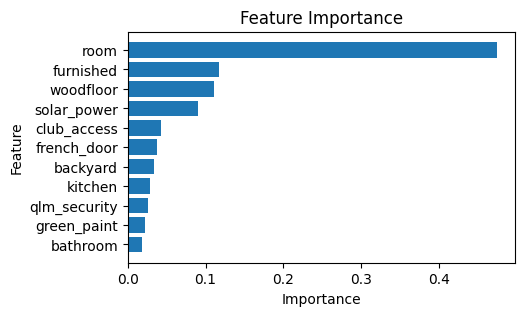

In [26]:
# calculating the features importance using standard deviation
features = pd.DataFrame(ML.coef_, X_train.columns, columns =['coefficients'])
features['std'] = std
features['importance'] = features['std'] * features['coefficients']
features['normalized_importance'] = (features.importance/sum(features.importance)).round(3)
features = features.sort_values('normalized_importance', ascending=True)

print(features.normalized_importance.sort_values(ascending= False))

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(features.index, features.normalized_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **RANDOM FORST REGRESSOR (RF)**

In [27]:
# import random forest regressor package 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=100)

In [28]:
# define hyparameters for random forest regressor

hyperparameters = {'n_estimators': list(range(140,180,20)),
                   'max_depth': list(range(12,16,2)),
                   }
GS_RF = GridSearchCV(RF, hyperparameters, cv=5)

In [29]:
# fitting the data
GS_RF.fit(scaled_X_train, y_train)

# select and display best hyparameters for random forest Regressor
best_RF = GS_RF.best_estimator_
print(GS_RF.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_RF = best_RF.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_RF[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

{'max_depth': 14, 'n_estimators': 160} 

Predicted y values:    [ 5305.  7725. 11433.  8763. 11096. 11503. 11743.  6973.  7857.  5888.]
Actual y test values:  [ 5068  7658 11318  8858 11178 11388 11748  6848  7828  5908]


### **RF Regressor Model Accuracy Evaluation**

In [30]:
# model accuracy metrics
r2_RF = r2_score(y_test, y_pred_RF).round(4)
MSE_RF = mean_squared_error(y_test, y_pred_RF).round(2)
MAE_RF = mean_absolute_error(y_test, y_pred_RF).round(2)

print('Train data - R-squared:', r2_score(y_train, best_RF.predict(scaled_X_train)).round(4))
print('Test data - R-squared:', r2_RF,'|', 'MSE:', MSE_RF,'|','MAE:', MAE_RF)

Train data - R-squared: 0.9985
Test data - R-squared: 0.9898 | MSE: 50199.17 | MAE: 169.82


### **RF Regressor Line Fitting**

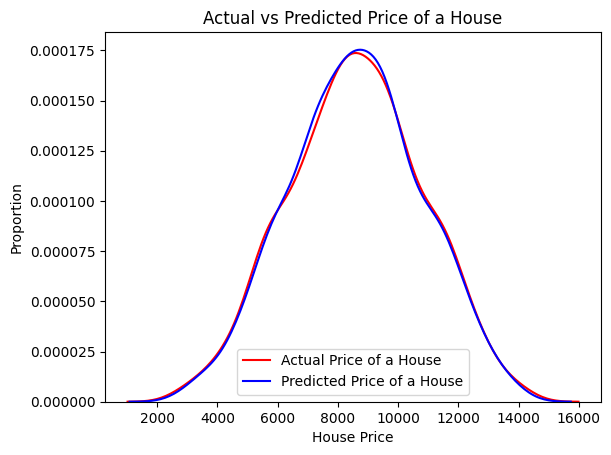

In [31]:
# plot actual price vs predicted price
ax1 = sns.kdeplot(y_test, color="r", label="Actual Price of a House")
ax = sns.kdeplot(y_pred_RF, color="b", label="Predicted Price of a House", ax = ax1)


plt.title('Actual vs Predicted Price of a House')
plt.xlabel('House Price')
plt.ylabel('Proportion')
plt.legend()

plt.show()
plt.close()

### **Features Importance in the Random Forest Model**

room            0.431
furnished       0.200
woodfloor       0.175
solar_power     0.114
club_access     0.026
backyard        0.015
kitchen         0.011
french_door     0.009
qlm_security    0.009
green_paint     0.007
bathroom        0.005
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

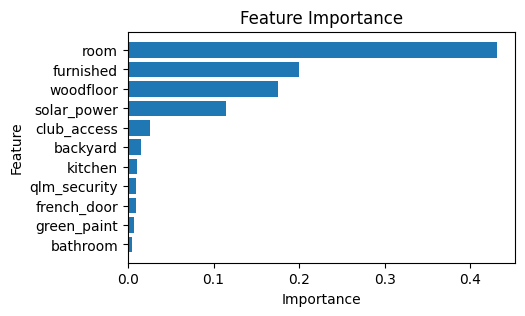

In [32]:
# Map feature importance values to feature names
feature_names = X_train.columns
feature_importances = pd.Series(abs(best_RF.feature_importances_.round(3)), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **EXTREME GRADIENT BOOSTING REGRESSOR (XGB)**

In [33]:
from xgboost.sklearn import XGBRegressor
# import XGB regressor package 
XGB = XGBRegressor(random_state=100)

In [34]:
# define hyparameters for XGB regressor

hyperparameters = {'n_estimators': list(range(140,180,20)),
                   'max_depth': list(range(2,6,2)),
                   'learning_rate':[1.0,1.5]
                  }
GS_XGB = GridSearchCV(XGB, hyperparameters, cv=5)

In [35]:
# fitting the data
GS_XGB.fit(scaled_X_train, y_train)

# select and display best hyparameters for XGBoost Regressor
best_XGB = GS_XGB.best_estimator_
print(GS_XGB.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_XGB = best_XGB.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_XGB[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

{'learning_rate': 1.5, 'max_depth': 2, 'n_estimators': 160} 

Predicted y values:    [ 5055.  7645. 11305.  8846. 11165. 11375. 11735.  6836.  7815.  5895.]
Actual y test values:  [ 5068  7658 11318  8858 11178 11388 11748  6848  7828  5908]


### **XGB Regressor Model Accuracy Evaluation**

In [36]:
# model accuracy metrics
r2_XGB = r2_score(y_test, y_pred_XGB).round(4)
MSE_XGB = mean_squared_error(y_test, y_pred_XGB).round(2)
MAE_XGB = mean_absolute_error(y_test, y_pred_XGB).round(2)

print('Train data - R-squared:', r2_score(y_train, best_XGB.predict(scaled_X_train)).round(4))
print('Test data - R-squared:', r2_XGB,'|', 'MSE:', MSE_XGB,'|','MAE:', MAE_XGB)

Train data - R-squared: 1.0
Test data - R-squared: 1.0 | MSE: 168.77 | MAE: 12.97


### **XGB Regressor Line Fitting**

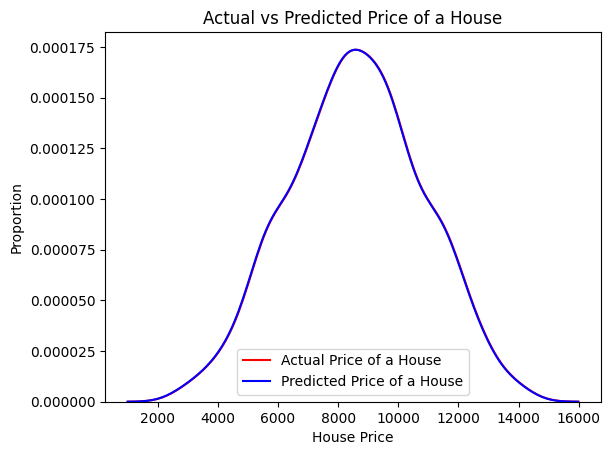

In [37]:
# plot actual price vs predicted price
ax1 = sns.kdeplot(y_test, color="r", label="Actual Price of a House")
ax = sns.kdeplot(y_pred_XGB, color="b", label="Predicted Price of a House", ax = ax1)


plt.title('Actual vs Predicted Price of a House')
plt.xlabel('House Price')
plt.ylabel('Proportion')
plt.legend()

plt.show()
plt.close()

### **Features Importance in the XGBoost Model**

furnished       0.260
solar_power     0.223
woodfloor       0.211
room            0.192
backyard        0.036
club_access     0.027
kitchen         0.017
qlm_security    0.014
green_paint     0.008
bathroom        0.007
french_door     0.006
dtype: float32


Text(0.5, 1.0, 'Feature Importance')

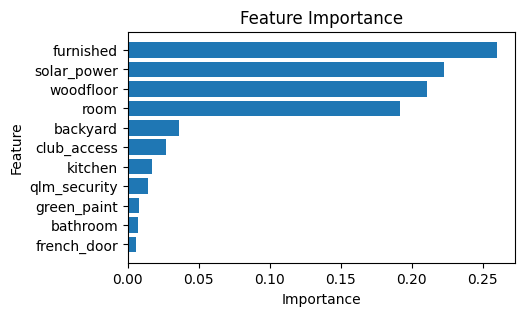

In [38]:
# Map feature importance values to feature names
feature_names = X_train.columns
feature_importances = pd.Series(abs(best_XGB.feature_importances_.round(3)), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

## **MODELS ACCURACY REPORT**

In [39]:
# Models accuracy report

metrics = [['Multilinear Regression', r2_ML, MSE_ML, MAE_ML],
           ['Random Forest Regressor', r2_RF, MSE_RF, MAE_RF],
           ['XGB Regressor', r2_XGB, MSE_XGB, MAE_XGB]]

metrics_df = pd.DataFrame(metrics, columns = ['Algorithm','R2-Score','Mean Squared Error', 'Mean Absolute Error'])
metrics_df.set_index('Algorithm', inplace =  True)
metrics_df.sort_values('Mean Absolute Error', ascending=True, inplace=True)

metrics_df

,R2-Score,Mean Squared Error,Mean Absolute Error
Algorithm,,,
Multilinear Regression,1.0000,146.28,10.22
XGB Regressor,1.0000,168.77,12.97
Random Forest Regressor,0.9898,50199.17,169.82


### Comparing the Predicted House Price of the Algorithms with the Actual Price of the Test Data.

In [40]:
# Converting X test data to pandas dataframe and reset the index or row number.
X_test = pd.DataFrame(X_test)
X_test.reset_index(drop = True, inplace = True)

# Converting Y test data to pandas dataframe and reset the index or row number.
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop = True, inplace = True)

# Converting Y predicted data to pandas dataframe and reset the index or row number.
y_pred_ML = pd.DataFrame(y_pred_ML)
y_pred_ML.columns = ['ML_Price']

# Combining X, Y, and predicted Y 
df_prediction = pd.concat([X_test, y_test, y_pred_ML.round()], axis = 1)

# Printing first 5 rows                     
df_prediction.head(20)   

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,ML_Price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5058.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7677.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11338.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8870.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11199.0
5,5,1,1,2,1,1,1,1,0,1,0,11388,11410.0
6,5,1,2,3,0,0,1,1,1,0,1,11748,11768.0
7,2,1,2,1,0,1,1,0,0,0,1,6848,6845.0
8,2,1,1,3,1,1,1,0,0,1,1,7828,7827.0
9,1,1,1,3,1,0,0,0,1,0,1,5908,5897.0
